# Decision Trees Exercise
In this exercise you will show that ID3 is sub-optimal. Implement a simple version of Decision Tree, and will then apply a Decision Tree classsifier on the MNIST hand written digits dataset that we already saw.


In [1]:
# Good summary of DT:
# https://towardsdatascience.com/algorithms-from-scratch-decision-tree-1898d37b02e0

## Suboptimality of ID3
Consider the following training set, where $\mathcal{X} = \{0, 1\}^3$ and $\mathcal{Y} =\{0, 1\}$:

$$
\begin{aligned}
((1, 1, 1), 1)\\
((1, 0, 0), 1)\\
((1, 1, 0), 0)\\
((0, 0, 1), 0)
\end{aligned}
$$

Suppose we wish to use this training set in order to build a decision tree of depth 2 (i.e. for each
input we are allowed to ask two questions of the form "$x_i = 0$?" before deciding on the label).

1. Suppose we run the ID3 algorithm up to depth 2 (namely, we pick the root node and its
children according to the algorithm, but instead of keeping on with the recursion, we stop
and pick leaves according to the majority label in each subtree, once we reach depth 2). 
Assume that the subroutine used to measure the quality of each feature is based on the information gain, and that if two features get the same score, one of them is picked arbitrarily. 
Show that the training error of the resulting decision tree is at least 1/4.
2. Find a decision tree of depth 2, which attains zero training error.


#### Answer
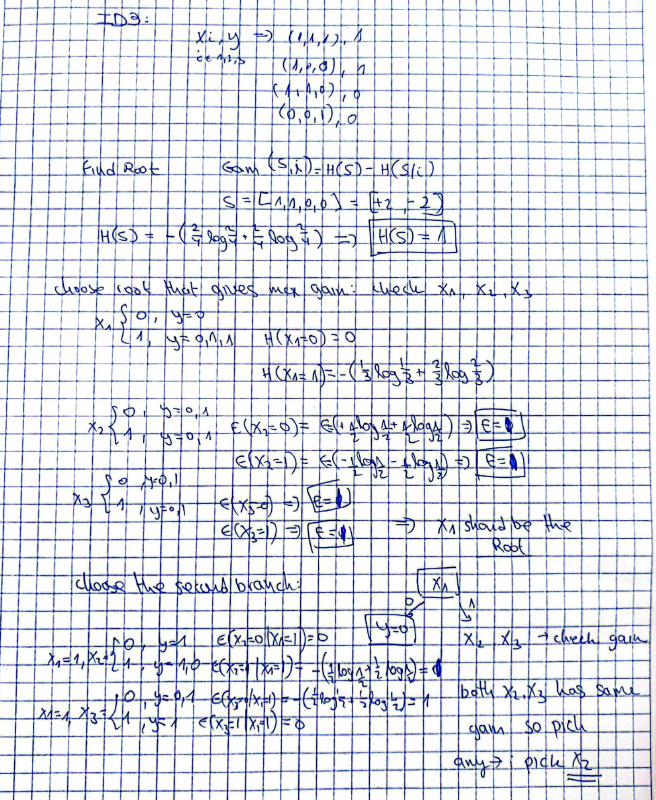
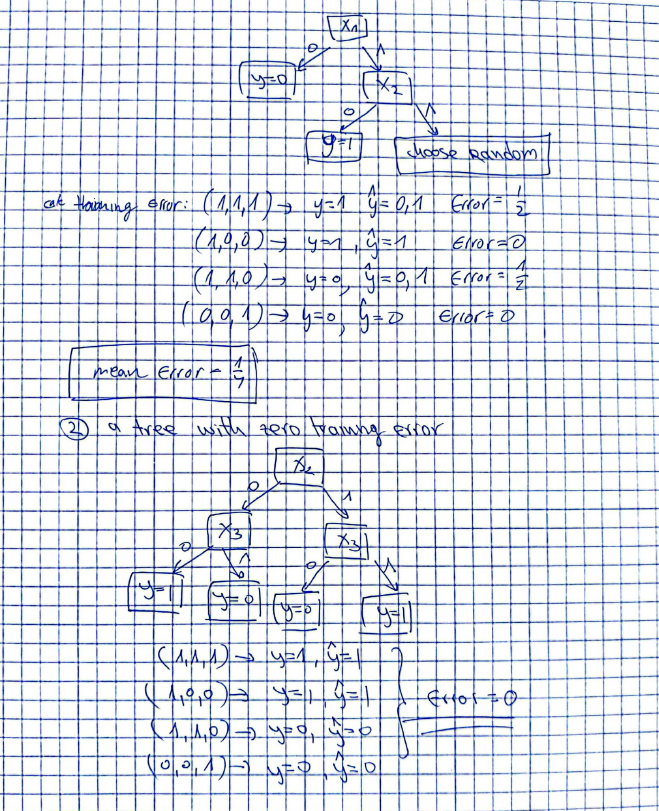

#### If you are unable to see the above images, please see handwritten responses located in separate pdf

#### Computing the handwritten answers using python

In [2]:
from math import log2
import numpy as np

In [3]:
def gain(y, split):
    n = len(y)
    root_entropy = entropy(y)
    pos_split = y[split]
    neg_split = y[~split]

    return entropy(y) - (len(pos_split) / n * entropy(pos_split)) - (len(neg_split) / n * entropy(neg_split))

def entropy(y):
    n = len(y)
    p = y.sum()
    q = n - p
    s = 0
    for v in [p, q]:
        if v > 0:
            s += v/n * log2(v/n)
    return -1.0 * s

In [4]:
y = np.array([1, 1, 0, 0])
X = np.array([
    [1, 1, 1],
    [1, 0, 0],
    [1, 1, 0],
    [0, 0, 1],
])

In [5]:
# Obtaining the starting entropy of the target using: H(x) = -plog(p) - (1-p)log(1-p).
# In the target there are two 1s and two 0s.
starting_entropy = -((2/4 * log2(2/4)) + (2/4 * log2(2/4)))
print(f'Entropy of the target: {starting_entropy}')

Entropy of the target: 1.0


In [6]:
# Compute entropy using function (should be same as above).
print(f'Entropy of the target: {entropy(y)}')

Entropy of the target: 1.0


In [7]:
print("Feature 1")
e_feature1_0 = 0
print(f'Entropy for Feature 1 being 0 is: 0')

e_feature1_1 = -((1/3 * log2(1/3)) + (2/3 * log2(2/3)))
print(f'Entropy for Feature 1 being 1 is: {e_feature1_1}')
print(f'Gain is {starting_entropy - ((1/4 * e_feature1_0) + (3/4 * e_feature1_1))}')

print("\n")
print("Feature 2")
e_feature2_0 = -((1/2 * log2(1/2)) + (1/2 * log2(1/2)))
print(f'Entropy for Feature 2 being 0 is: {e_feature2_0}')

e_feature2_1 = -((1/2 * log2(1/2)) + (1/2 * log2(1/2)))
print(f'Entropy for Feature 2 being 1 is: {e_feature2_1}')

print(f'Gain is {starting_entropy - ((2/4 * e_feature2_0) + (2/4 * e_feature2_1))}')

print("\n")
print("Feature 3")
e_feature3_0 = -((1/2 * log2(1/2)) + (1/2 * log2(1/2)))
print(f'Entropy for Feature 3 being 0 is: {e_feature3_0}')

e_feature3_1 = -((1/2 * log2(1/2)) + (1/2 * log2(1/2)))
print(f'Entropy for Feature 3 being 1 is: {e_feature3_1}')

print(f'Gain is {starting_entropy - ((2/4 * e_feature3_0) + (2/4 * e_feature3_1))}')

Feature 1
Entropy for Feature 1 being 0 is: 0
Entropy for Feature 1 being 1 is: 0.9182958340544896
Gain is 0.31127812445913283


Feature 2
Entropy for Feature 2 being 0 is: 1.0
Entropy for Feature 2 being 1 is: 1.0
Gain is 0.0


Feature 3
Entropy for Feature 3 being 0 is: 1.0
Entropy for Feature 3 being 1 is: 1.0
Gain is 0.0


In [8]:
# Compute gain for each feature using gain function.
print("First level:")
for f in range(3):
    print(f"    Gain(X, feature {f+1}) = {gain(y, X[:, f] > 0):.4f}")

First level:
    Gain(X, feature 1) = 0.3113
    Gain(X, feature 2) = 0.0000
    Gain(X, feature 3) = 0.0000


In [9]:
# Checking the entropy of features 2 and 3 to determine which one will be the next node.
print("Feature 2")
e_feature2_0_w_feature1_1 = 0 
print(f'Entropy for Feature 2 being 0, when Feature 1 is 1 is: {e_feature2_0_w_feature1_1}') 

e_feature2_1_w_feature1_1 = -((1/2 * log2(1/2)) + (1/2 * log2(1/2)))
print(f'Entropy for Feature 2 being 1, when Feature 1 is 1 is: {e_feature2_1_w_feature1_1}')

print(f'Gain is {e_feature1_1 - ((1/3 * e_feature2_0_w_feature1_1) + (2/3 * e_feature2_1_w_feature1_1))}')

print("\n")
print("Feature 3")
e_feature3_0_w_feature1_1 = -((1/2 * log2(1/2)) + (1/2 * log2(1/2)))
print(f'Entropy for Feature 3 being 0, when Feature 1 is 1 is: {e_feature3_0_w_feature1_1}')

e_feature3_1_w_feature1_1 = 0
print(f'Entropy for Feature 3 being 1, when Feature 1 is 1 is: {e_feature3_1_w_feature1_1}')

print(f'Gain is {e_feature1_1 - ((2/3 * e_feature3_0_w_feature1_1) + (1/3 * e_feature3_1_w_feature1_1))}')


Feature 2
Entropy for Feature 2 being 0, when Feature 1 is 1 is: 0
Entropy for Feature 2 being 1, when Feature 1 is 1 is: 1.0
Gain is 0.2516291673878229


Feature 3
Entropy for Feature 3 being 0, when Feature 1 is 1 is: 1.0
Entropy for Feature 3 being 1, when Feature 1 is 1 is: 0
Gain is 0.2516291673878229


In [10]:
# Compute gain for each feature using gain function.
print("Second level (positive side):")
X_level2_pos = X[X[:, 0] == 1, :]
y_level2_pos = y[X[:, 0] == 1]
for f in [1, 2]:
    print(f"    Gain(X, feature {f+1}) = {gain(y_level2_pos, X_level2_pos[:, f] > 0):.4f}")

Second level (positive side):
    Gain(X, feature 2) = 0.2516
    Gain(X, feature 3) = 0.2516


#### Explanations
- We have 3 features that correspond to columns 1, 2 and 3.
- Target is binary and predicts 0 or 1.

##### Task 1
We have 3 leaf nodes:
 - 2 of them have a single training example in them, so they will have 0 training error
 - 1 of the leaf nodes has a training example of each class, so one of them will be misclassified and other will be classified correctly

    Therefore, the training error will be 1/4 (training accuracy 3/4).

##### Task 2
Since we built a tree with 1 training example in each leaf node, then we have zero training error.

##### General comments on the ID3 algorithm
The ID3 algorithm is sub-optimal because it will choose feature 1 as the root node, which will yield 1/4 training error for a depth 2 tree. However, if it chose either of the other features as the root node, it could obtain 0 training error for a depth 2 tree.

## Implementing Decision Tree From Scratch
In this exercise you will need to implement a simple version of Decision Tree from scratch. Your decision tree will handle **continuous input and output** (this should actually work also for binary input attributes).

* Compelete the skeleton class below
  - `X` is a matrix of data values (rows are samples, columns are attributes)
  - `y` is a vector of corresponding target values
  - `min_leaf` is the minimal number of samples in each leaf node
  
* For splitting criterion, use either **"Train Squared Error Minimization (Reduction in Variance)"** or **"Train Absolute Error Minimization"** (choose one). Whatever you choose, make sure you implement the splitting point decision efficiently (in $O(nlgn)$ time).

* The `predict` function will use mean of the target values in the leaf node matching each row of the given `X`. The result is a vector of predictions matching the number of rows in `X`.

* To check your decision tree implementation, use the boston dataset (`from sklearn.datasets import load_boston`) split the data set into train and test using (`from sklearn.model_selection import train_test_split`)

  - Use the following to estimate what are the best hyper parameters to use for your model
```
    for min_leaf in [1,5,10,100]:
      dt = DecisionTree(X, y, n, sz, min_leaf)
      mse = # mean square error over test set
      print("min_leaf:{0} --- oob mse: {1}".format(min_leaf, mse))
```
  
  - Using your chosen hyperparameters as a final model, plot the predictions vs. true values of all the samples in the training set . Use something like:
  ```
  y_hat = dt.predict(X_train)  # forest is the chosen model
  plt.scatter(y_hat, y_test)
  ```

In [11]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import metrics
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from abc import ABC,abstractmethod
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [12]:
# Class Implementation
# for each feature (total of 13) - run for sorted sampled values and find the split for minimum variance (MSE)
# choose the feature with the minimum variance for best split to be the root of the tree.
# check for each leaf if the number of samples > min_leaf
# for every sub-branch take the applicable samples and choose the best split for best feature with min variance - split the data again
# until reaching the leafs for which samples < min_leaf

In [13]:
# Class to control tree node
class Node:
    # initializer
    def __init__(self):
        self.__Bs    = None
        self.__Bf    = None
        self.__left  = None
        self.__right = None
        self.leafv   = None
    # set the split,feature parameters for this node
    def set_params(self,Bs,Bf):
        self.__Bs = Bs
        self.__Bf = Bf
        
    # get the split,feature parameters for this node
    def get_params(self):
        return(self.__Bs,self.__Bf)   
    
    # set the left/right children nodes for this current node
    def set_children(self,left,right):
        self.__left  = left
        self.__right = right
        
    # get the left child node
    def get_left_node(self):
        return(self.__left)
    
    # get the right child node
    def get_right_node(self):
        return(self.__right)

In [14]:
# Base class to encompass the decision tree algorithm
class DecisionTree(ABC):
    # initializer
    def __init__(self, max_depth=None, min_leaf=1):
        self.tree              = None
        self.max_depth         = max_depth  # this defines the maximum number of levels to be allowed while growing the tree 
        self.min_leaf = min_leaf #this defines the minimum number of samples to allow a split to occur at any given node 
    # protected function to define the impurity -  both will take in a data matrix D and return the impurity metric or leaf value, respectively
    @abstractmethod
    def _impurity(self,D):
         pass
        
    # protected function to compute the value at a leaf node
    @abstractmethod
    def _leaf_value(self,D):
         pass
        
    # private recursive function to grow the tree during training
    def __grow(self,node,D,level):       
        #are we in a leaf node? let's do some check...
        depth = (self.max_depth is None) or (self.max_depth >= (level+1)) # depth?
        msamp = (self.min_leaf <= D.shape[0]) # min split is smaller than the number of samples in the data
        n_cls = np.unique(D[:,-1]).shape[0] != 1 # number of classes in the data left in the branch
        
        # not a leaf node
        if depth and msamp and n_cls:
        
            # initialize the function parameters
            ip_node = None
            feature = None
            split   = None
            left_D  = None
            right_D = None
            # iterrate through the possible feature/split combinations
            for f in range(D.shape[1]-1): # iterate on f = features
                for s in np.unique(D[:,f]): # iterate on all unique values of the choosen f
                    #for the current (f,s) combination, split the dataset
                    D_l = D[D[:,f]<=s] # left - all values that are smaller than s
                    D_r = D[D[:,f]>s]  # right - all values bigger than s
                    #ensure we have non-empty arrays
                    if D_l.size and D_r.size:
                        # calculate the impurity - norm by fraction of samples in the node from all samples
                        ip  = (D_l.shape[0]/D.shape[0])*self._impurity(D_l) + (D_r.shape[0]/D.shape[0])*self._impurity(D_r)
                        # now update the impurity and choice of (f,s)
                        if (ip_node is None) or (ip < ip_node): # no need to pre-define "ip" for "or" line
                            ip_node = ip # update the min impurity
                            feature = f # update choosen features
                            split   = s # update the choosen split value
                            left_D  = D_l # update samples in left branch
                            right_D = D_r # update samplesin right branch
            # set the current node's parameters
            node.set_params(split,feature)
            # declare child nodes
            left_node  = Node()
            right_node = Node()
            node.set_children(left_node,right_node)
            # investigate child nodes
            self.__grow(node.get_left_node(),left_D,level+1)
            self.__grow(node.get_right_node(),right_D,level+1)
                        
        # is a leaf node
        else:
            
            #set the node value & return  (mean value of all labels in leaf)
            node.leafv = self._leaf_value(D)
            return
        
    # private recursive function to traverse the (trained) tree
    def __traverse(self,node,Xrow):
        # check if we're in a leaf node?
        if node.leafv is None:
            # get parameters at the node
            (s,f) = node.get_params()
            # decide to go left or right?
            if (Xrow[f] <= s):
                return(self.__traverse(node.get_left_node(),Xrow))
            else:
                return(self.__traverse(node.get_right_node(),Xrow))
        else:
            # return the leaf value
            return(node.leafv)
        
         # train the tree model
    def train(self,Xin,Yin):
        # prepare the input data
        D = np.concatenate((Xin,Yin.reshape(-1,1)),axis=1)
        # set the root node of the tree
        self.tree = Node()
        # build the tree
        self.__grow(self.tree,D,1)
        
    # make predictions from the trained tree
    def predict(self,Xin):
        # iterrate through the rows of Xin
        p = []
        for r in range(Xin.shape[0]):
            p.append(self.__traverse(self.tree,Xin[r,:]))
        # return predictions
        return(np.array(p).flatten())
    
    
    # Decision Tree Regressor
class DecisionTreeRegressor(DecisionTree):
    # initializer
    def __init__(self, max_depth=None, min_leaf=1, loss='mse'):
        DecisionTree.__init__(self,max_depth,min_leaf)
        self.loss = loss   # here 'mse' was chosen
    
    # private function to define the mean squared error
    def __mse(self,D):
        # compute the mean target for the node
        y_m = np.mean(D[:,-1])
        # compute the mean squared error wrt the mean
        E = np.sum((D[:,-1] - y_m)**2)/D.shape[0]
        # return mse
        return(E)
    
    # private function to define the mean absolute error
    def __mae(self,D):
        # compute the mean target for the node
        y_m = np.mean(D[:,-1])
        # compute the mean absolute error wrt the mean
        E = np.sum(np.abs(D[:,-1] - y_m))/D.shape[0]
        # return mae
        return(E)
    
    # protected function to define the impurity
    def _impurity(self,D):
        # use the selected loss function to calculate the node impurity
        ip = None
        if self.loss == 'mse':
            ip = self.__mse(D)
        elif self.loss == 'mae':
            ip = self.__mae(D)
        # return results
        return(ip)
    
    # protected function to compute the value at a leaf node
    def _leaf_value(self,D):
         return(np.mean(D[:,-1]))

In [15]:
# %% Load Boston Housing Dataset
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names) # attributes
prices = pd.DataFrame(boston_dataset.target)  # house prices - labels
X, y = load_boston(return_X_y=True)


#%% Descriptive Statistics
# boston.shape
# boston.describe()
# boston.info()
# print(boston_dataset.keys())

c:\Users\kherz\anaconda3\envs\ydata\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing

In [16]:
# Creating the train and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [17]:
## Declare the regressor and train the model ##
rgr = DecisionTreeRegressor(max_depth=15,min_leaf = 10,loss='mse')
rgr.train(X_train,y_train)
## Make predictions ##
yp = rgr.predict(X_test)
## Evaluate model performance ##
print("rmse: %.2f" % np.sqrt(mean_squared_error(y_test,yp)))
print("mae: %.2f" % mean_absolute_error(y_test,yp))
print("mse: %.2f" % mean_squared_error(y_test,yp))
print("r2: %.2f" % r2_score(y_test,yp))

rmse: 3.45
mae: 2.62
mse: 11.91
r2: 0.81


In [18]:
for min_leaf in [1,5,10,100]:
    rgr = DecisionTreeRegressor(max_depth=15,min_leaf = min_leaf,loss='mse')
    rgr.train(X_train,y_train)
    ## Make predictions ##
    yp = rgr.predict(X_test)
    ## Evaluate model performance ##
    # mse =  mean square error over test set 
    print("min_leaf:{0} --- oob mse: {1}".format(min_leaf, np.sqrt(mean_squared_error(y_test,yp))))
print("best hyper parameter is min_leaf = 5, since 10 and 5 has similar errors and we would like to keep the tree simple as possible")

min_leaf:1 --- oob mse: 3.5657092611031933
min_leaf:5 --- oob mse: 3.4929325028344884
min_leaf:10 --- oob mse: 3.4506496627898473
min_leaf:100 --- oob mse: 5.0561579074694345
best hyper parameter is min_leaf = 5, since 10 and 5 has similar errors and we would like to keep the tree simple as possible


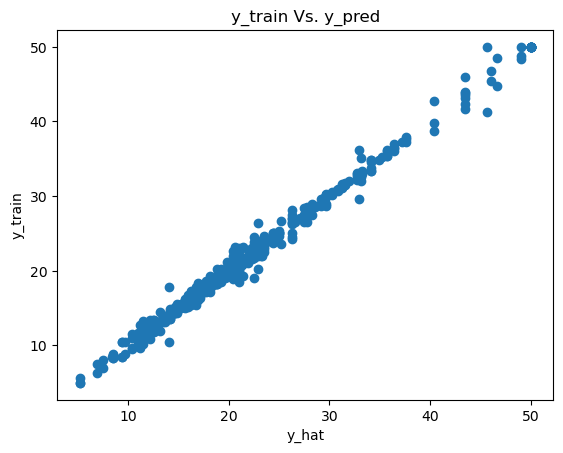

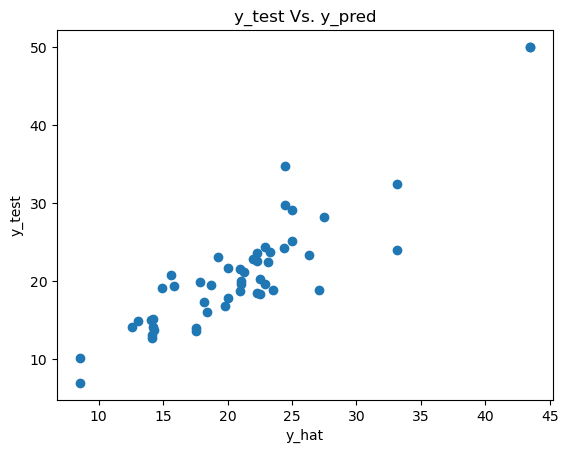

In [19]:
# Scatter plot
rgr = DecisionTreeRegressor(max_depth=15,min_leaf = 5,loss='mse')
rgr.train(X_train,y_train)

y_hat = rgr.predict(X_train)  # my model 5 min_leaf
plt.scatter(y_hat, y_train)
plt.title("y_train Vs. y_pred")
plt.xlabel("y_hat")
plt.ylabel("y_train")
plt.show()

y_hat = rgr.predict(X_test)  # my model 5 min_leaf
plt.scatter(y_hat, y_test)
plt.title("y_test Vs. y_pred")
plt.xlabel("y_hat")
plt.ylabel("y_test")
plt.show()

In [20]:
# Using sklearn.

In [21]:
model = Pipeline([
    ('tree', tree.DecisionTreeRegressor())
])

In [22]:
# Report accuracy of tuned model
parameters = {
    'tree__min_samples_leaf':[1,5,10,100], 
}
grid = GridSearchCV(model, cv=5, param_grid=parameters)
grid.fit(X_train, y_train)
print(f"Best tuned model (min_samples_leaf={grid.best_params_['tree__min_samples_leaf']:d}):")
print(f"    Training MSE: {metrics.mean_squared_error(y_train, grid.predict(X_train)):.4f}")
print(f"    Test MSE: {metrics.mean_squared_error(y_test, grid.predict(X_test)):.4f}")

Best tuned model (min_samples_leaf=10):
    Training MSE: 11.6629
    Test MSE: 9.0386


Text(0, 0.5, 'Actual')

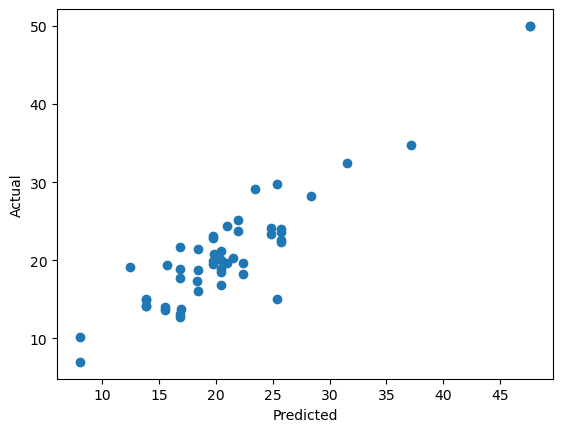

In [23]:
plt.scatter(grid.predict(X_test), y_test)
plt.xlabel("Predicted")
plt.ylabel("Actual")

## Using Decision Tree for Digits Classification
Remeber the MNIST dataset used - you will now test the power of decision trees on this problem.
This time you are given a free hand in choosing the test and train set sizes, model parameters (such as gain function and constraints over the trees) and features (whether to use binary pixel values or the original continous gray value).
- Choose which model parameters you wish to optimize, explain how would you do that, and find a model which you believe would have the minimal generalization error --- do this for both a single decision tree model, and a random forest.
  - You can use `sklearn.tree.DecisionTreeClassifier`
- Once you are satisfied with the model parameters, plot the importance of each of the pixels to the final decision.
- Last, estimate the class assignment probabilities for all the correctly classified and misclassified examples in your test data.
- Discuss your results.

In [24]:
# Standard Libraries
import os
import numpy as np 
import pandas as pd 
import random as rn

# Visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling and Machine Learning
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier

# Datasets
from sklearn.datasets import fetch_openml

In [25]:
# Set plot style
sns.set_style({"axes.facecolor": ".95"})

In [26]:
# Load Data
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False) # as_frame=False returns numpy arrays

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [27]:
print (np.shape(X_train))

(63000, 784)


In [28]:
# Train baseline decision tree model
seed=0
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
clf.tree_

In [30]:
clf.predict(X_test)

array(['1', '1', '0', ..., '3', '8', '7'], dtype=object)

In [31]:
print(f"Baseline model - train score is: {clf.score(X_train,y_train)}" )
print(f"Baseline model - test score is: {clf.score(X_test,y_test)}" ) 

Baseline model - train score is: 1.0
Baseline model - test score is: 0.8794285714285714


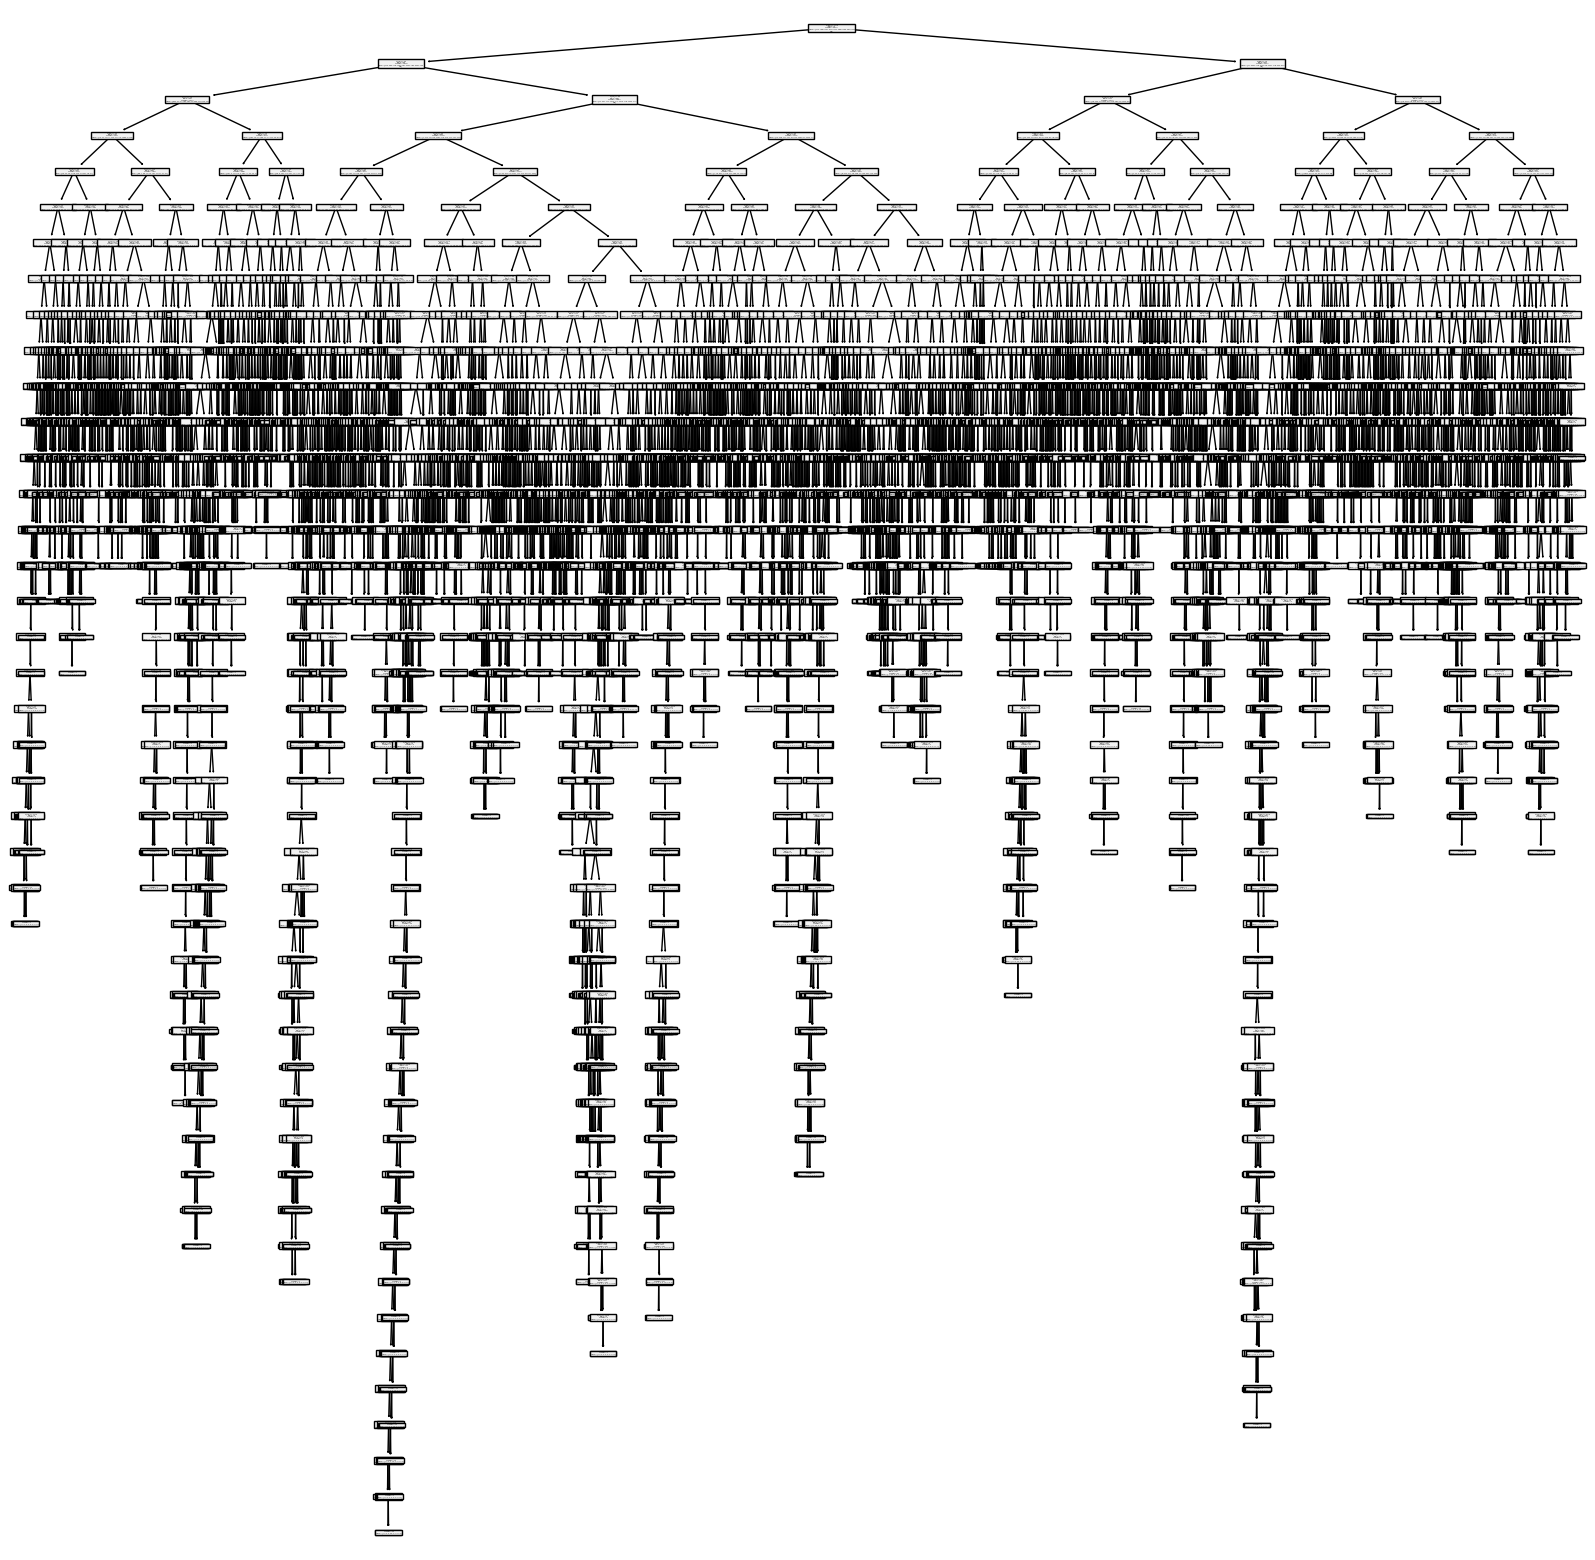

In [32]:
# Plot baseline model
plt.figure(figsize=(20, 20))
tree.plot_tree(clf)
plt.show()

In [33]:
# List of parameters
clf.get_params().keys() 

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [34]:
model = Pipeline([
    ('tree', tree.DecisionTreeClassifier())
])

In [35]:
# Report accuracy of tuned model
parameters = {
    'tree__criterion': ["gini", "entropy"],
    'tree__min_samples_leaf':[2,5,10,100, 250, 500], 
    'tree__max_depth':[2, 5, 10, 15], 
}
grid = GridSearchCV(model, cv=5, param_grid=parameters, n_jobs=-1)
grid.fit(X_train, y_train)
params = grid.best_params_
y_pred = grid.predict(X_test)

In [36]:
print(f"Best tuned Tree model (criterion={params['tree__criterion']}, min_samples_leaf={params['tree__min_samples_leaf']:d}, max_depth={params['tree__max_depth']:d}):")
print(f"    Training Accuracy: {metrics.accuracy_score(y_train, grid.predict(X_train)):.2%}")
print(f"    Test Accuracy: {metrics.accuracy_score(y_test, y_pred):.2%}")

Best tuned Tree model (criterion=entropy, min_samples_leaf=5, max_depth=15):
    Training Accuracy: 95.63%
    Test Accuracy: 87.67%


In [37]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       690
           1       0.96      0.97      0.96       788
           2       0.86      0.85      0.86       699
           3       0.83      0.85      0.84       714
           4       0.85      0.86      0.85       682
           5       0.83      0.83      0.83       631
           6       0.90      0.89      0.89       688
           7       0.91      0.91      0.91       729
           8       0.86      0.81      0.84       683
           9       0.83      0.84      0.84       696

    accuracy                           0.88      7000
   macro avg       0.88      0.87      0.87      7000
weighted avg       0.88      0.88      0.88      7000



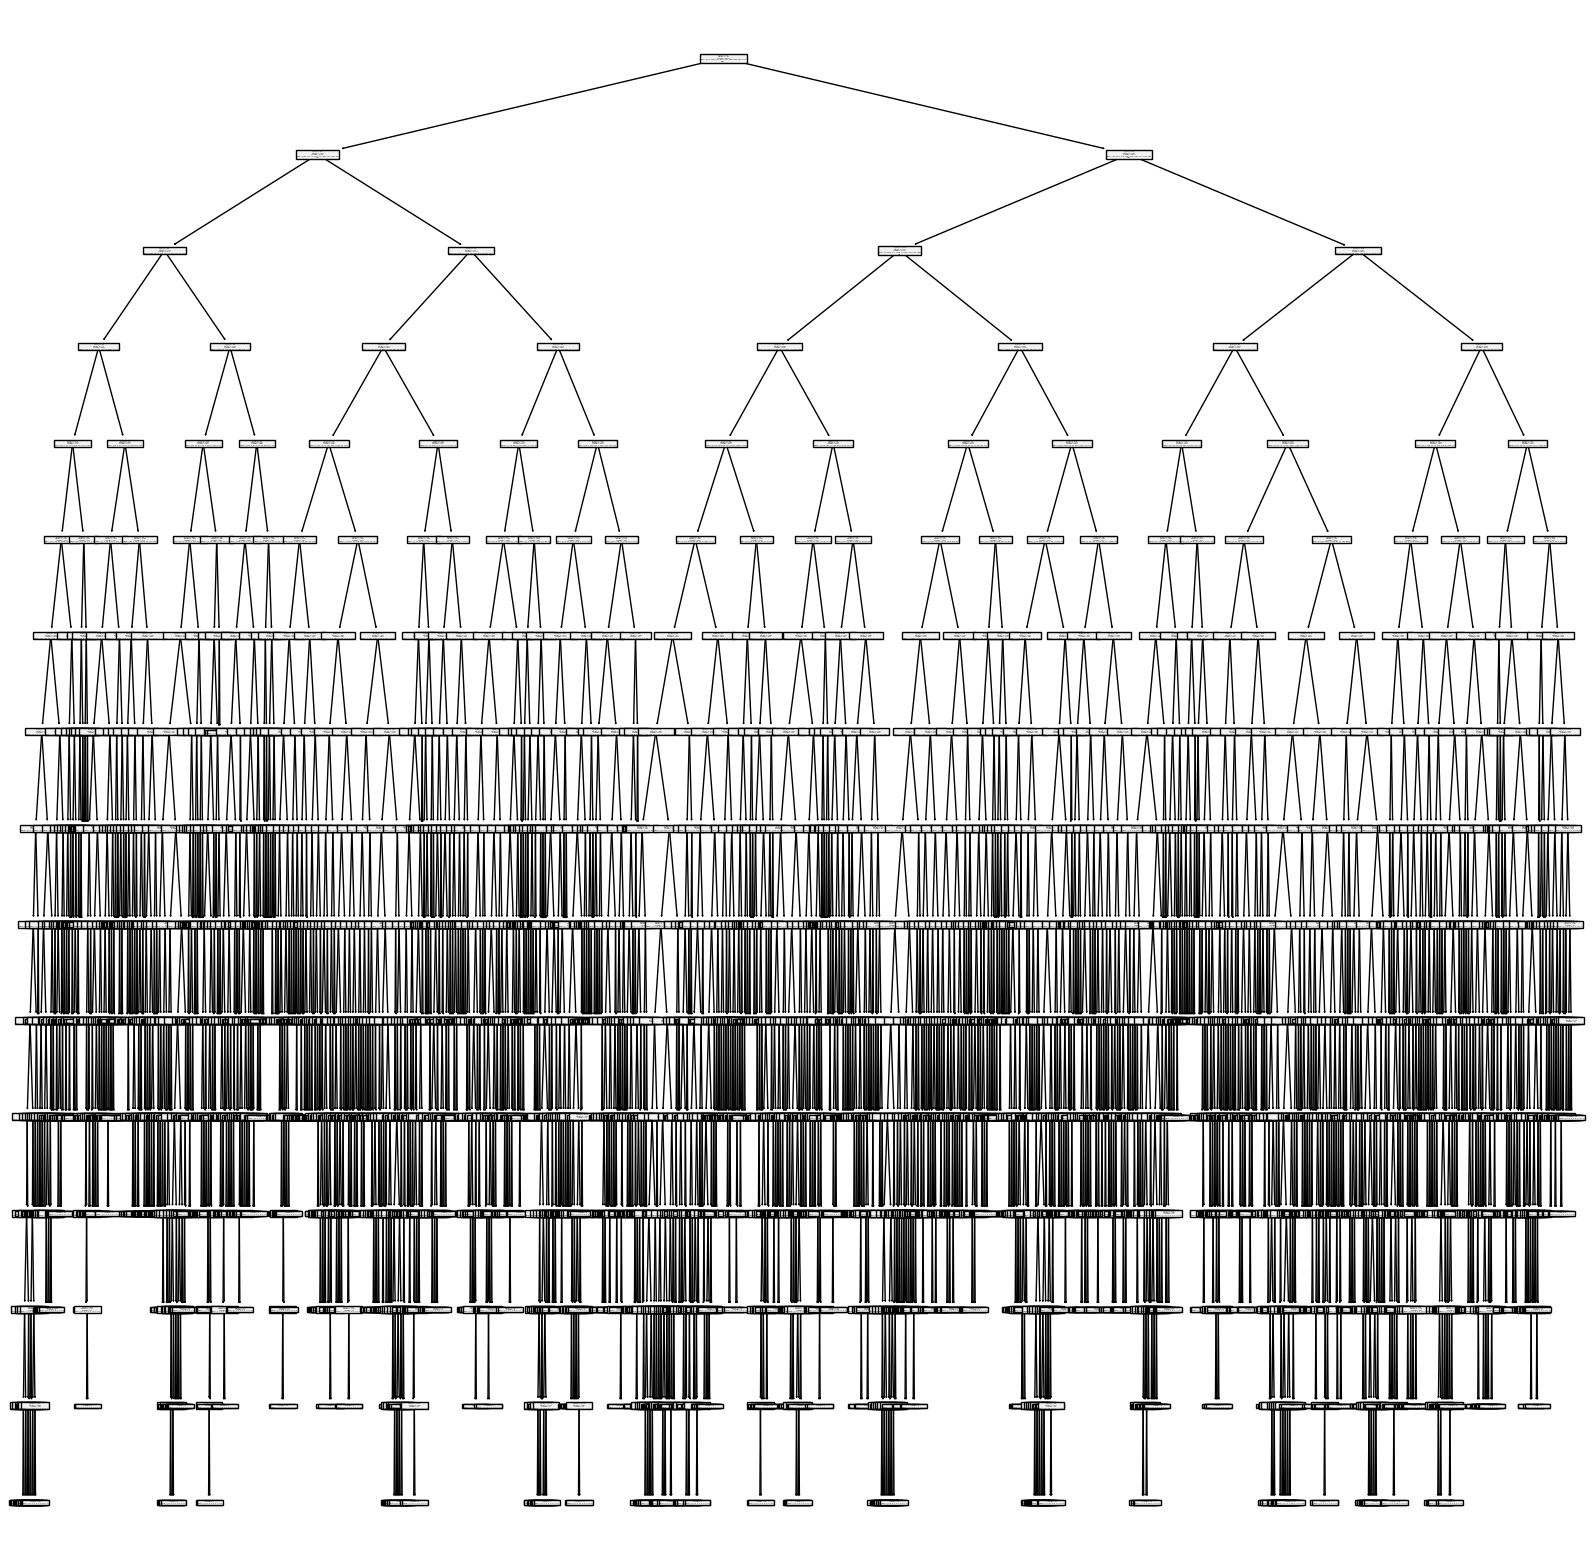

In [38]:
# Show tree.
plt.figure(figsize=(20, 20))
tree.plot_tree(grid.best_estimator_.named_steps["tree"])
plt.show()

In [39]:
def get_feature_depths_from_tree(clf):
    """Return DataFrame with the following columns: feature, depth. """
    # Code modified from https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html
    n_nodes = clf.tree_.node_count
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    feature = clf.tree_.feature
    threshold = clf.tree_.threshold

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
    while len(stack) > 0:
        # `pop` ensures each node is only visited once
        node_id, depth = stack.pop()
        node_depth[node_id] = depth

        # If the left and right child of a node is not the same we have a split
        # node
        is_split_node = children_left[node_id] != children_right[node_id]
        # If a split node, append left and right children and depth to `stack`
        # so we can loop through them
        if is_split_node:
            stack.append((children_left[node_id], depth + 1))
            stack.append((children_right[node_id], depth + 1))
        else:
            is_leaves[node_id] = True

    feature_depth_list = []
    for i in range(n_nodes):
        if is_leaves[i]:
            continue

        feature_depth_list.append({
            "feature": feature[i],
            "depth": node_depth[i],
        })
    
    return pd.DataFrame(feature_depth_list)

In [40]:
# List features in decreasing order of importance based on tree nodes.
sorted_features = get_feature_depths_from_tree(grid.best_estimator_.named_steps["tree"]).sort_values("depth").drop_duplicates("feature")
sorted_features

feature  depth
0         461      0
1         378      1
786       373      1
2         597      2
1418      542      2
...       ...    ...
1752      569     13
1441      314     13
1839      715     13
816       499     13
1442      717     14

[377 rows x 2 columns]

In [41]:
# Assign minimum tree depth to each pixel, with unused pixels assigned one more than max depth.
# Root node is 0, higher value indicates lower importance.
feature_importance = (sorted_features["depth"].max() + 1) * np.ones(X.shape[1])
feature_importance[sorted_features["feature"]] = sorted_features["depth"]

# Make high value mean high importance.
feature_importance = feature_importance.max() - feature_importance


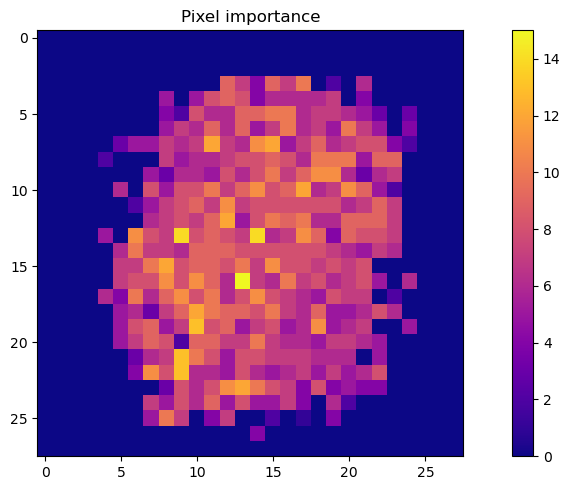

In [42]:
# Plot pixel importance.
plt.figure(figsize=(10, 5))
plt.imshow(feature_importance.reshape(28, 28), cmap='plasma')
plt.title("Pixel importance")
plt.colorbar()
plt.tight_layout()
plt.show()

Pixel significance: It makes sense that the pixels that are most significant are the ones in the middle section of the image (where they are part of the digit itself) and the rest (which are the contour of the image) are less significant.

In [43]:
# Get class probabilities.
# This is a matrix where each row is a sample in the test set, and each column represents a class.
# The values are the probability of predicting the class for each sample.
proba_test = grid.predict_proba(X_test)
proba_test

array([[0.   , 1.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.25 , ..., 0.   , 0.625, 0.   ],
       [1.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 1.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 1.   , 0.   , 0.   ]])

In [44]:
# The max probabily in each row represents the predicted class.
# Show the mean predicted probabilities for correctly vs incorrectly classified samples.
misclassified = y_test != y_pred
print(f"Probability of correctly classified test examples: {proba_test[~misclassified].max(axis=1).mean():.4f}")
print(f"Probability of misclassified test examples: {proba_test[misclassified].max(axis=1).mean():.4f}")

Probability of correctly classified test examples: 0.9767
Probability of misclassified test examples: 0.7657


It makes sense that the average probability for correctly classified samples is higher than the average probability of misclassified samples.
In other words, the classifier was less certain when it misclassified.

#### Can a Random Forest do better?

In [46]:
from sklearn.ensemble import RandomForestClassifier

model = Pipeline([
    ('tree', RandomForestClassifier(n_jobs=-1))
])

# Report accuracy of tuned model
parameters = {
    'tree__n_estimators': [10, 50, 100, 200],
}
grid = GridSearchCV(model, cv=5, param_grid=parameters, n_jobs=-1)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)

In [47]:
params = grid.best_params_
print(f"Best Random Forest model (n_estimators={params['tree__n_estimators']}):")
print(f"    Training Accuracy: {metrics.accuracy_score(y_train, grid.predict(X_train)):.2%}")
print(f"    Test Accuracy: {metrics.accuracy_score(y_test, y_pred):.2%}")

Best Random Forest model (n_estimators=200):
    Training Accuracy: 100.00%
    Test Accuracy: 96.66%


In [48]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       690
           1       0.98      0.98      0.98       788
           2       0.96      0.97      0.97       699
           3       0.95      0.95      0.95       714
           4       0.97      0.96      0.97       682
           5       0.97      0.96      0.97       631
           6       0.97      0.99      0.98       688
           7       0.97      0.97      0.97       729
           8       0.96      0.95      0.95       683
           9       0.94      0.94      0.94       696

    accuracy                           0.97      7000
   macro avg       0.97      0.97      0.97      7000
weighted avg       0.97      0.97      0.97      7000



The random forest was able to solve the overfitting problem using a single decision tree and obtain 97% accuracy on the test set